In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange

random.seed(1)
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("wetransfer-2ee104//google-cpu-full.npy")

# full_cpu is a list of pandas series of the cpu utilisation of all machines
# just a lazy way of converting nd-arrays to pd-series
full_cpu = []
for x in range (0,len(np_cpu)):
    full_cpu.append(pd.Series(np_cpu[x], index = x_axis))     

In [14]:
df = pd.DataFrame({0: (full_cpu[0].to_list()), 
                   1: (full_cpu[1].to_list()), 
                   2: (full_cpu[2].to_list()) , 
                   3: (full_cpu[3].to_list()),
                  4: (full_cpu[4].to_list()),
                  5: (full_cpu[5].to_list()),
                  6: (full_cpu[6].to_list())
                  })

df_correlation = df.corr()
df_correlation

,0,1,2,3,4,5,6
0,1.000000,0.182548,0.293396,0.147556,-0.371543,0.434098,0.198072
1,0.182548,1.000000,0.243375,0.189525,-0.006541,0.171590,0.244268
2,0.293396,0.243375,1.000000,0.140648,-0.112303,0.053745,0.186293
3,0.147556,0.189525,0.140648,1.000000,0.058056,0.253711,0.241811
4,-0.371543,-0.006541,-0.112303,0.058056,1.000000,0.014277,0.045071
5,0.434098,0.171590,0.053745,0.253711,0.014277,1.000000,0.283545
6,0.198072,0.244268,0.186293,0.241811,0.045071,0.283545,1.000000


In [16]:
def second_largest_number(list1):
    k=max(list1[0],list1[1]) 
    secondmax=min(list1[0],list1[1]) 

    for i in range(2,len(list1)): 
        if list1[i]>k: 
            secondmax=k
            k=list1[i] 
        else: 
            if list1[i]>secondmax: 
                secondmax=list1[i]
    return secondmax



In [24]:
mapping = {}
for x in df_correlation:
    mapping[x] = second_largest_number(df_correlation[x])
    
df_max_correlation = pd.Series(mapping)    
df_max_correlation

0    0.434098
1    0.244268
2    0.293396
3    0.253711
4    0.058056
5    0.434098
6    0.283545
dtype: float64

In [31]:
sorted_max_correlation = max_correlation.sort_values()

In [40]:
from sklearn.cluster import AgglomerativeClustering as agc
# cluster = agc(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster = agc(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_correlation)

array([2, 0, 0, 0, 1, 2, 0])

In [41]:
df_correlation

,0,1,2,3,4,5,6
0,1.000000,0.182548,0.293396,0.147556,-0.371543,0.434098,0.198072
1,0.182548,1.000000,0.243375,0.189525,-0.006541,0.171590,0.244268
2,0.293396,0.243375,1.000000,0.140648,-0.112303,0.053745,0.186293
3,0.147556,0.189525,0.140648,1.000000,0.058056,0.253711,0.241811
4,-0.371543,-0.006541,-0.112303,0.058056,1.000000,0.014277,0.045071
5,0.434098,0.171590,0.053745,0.253711,0.014277,1.000000,0.283545
6,0.198072,0.244268,0.186293,0.241811,0.045071,0.283545,1.000000


In [45]:
df_correlation_squared = df_correlation**2
df_correlation_squared

,0,1,2,3,4,5,6
0,1.000000,0.033324,0.086081,0.021773,0.138044,0.188441,0.039233
1,0.033324,1.000000,0.059232,0.035920,0.000043,0.029443,0.059667
2,0.086081,0.059232,1.000000,0.019782,0.012612,0.002889,0.034705
3,0.021773,0.035920,0.019782,1.000000,0.003371,0.064369,0.058473
4,0.138044,0.000043,0.012612,0.003371,1.000000,0.000204,0.002031
5,0.188441,0.029443,0.002889,0.064369,0.000204,1.000000,0.080398
6,0.039233,0.059667,0.034705,0.058473,0.002031,0.080398,1.000000


In [53]:
selected_machines = sorted_max_correlation.index[-3:].to_list()
selected_machines_correlation_matrix = df_correlation[selected_machines].iloc[selected_machines]

In [54]:
selected_machines_correlation_matrix

,2,0,5
2,1.000000,0.293396,0.053745
0,0.293396,1.000000,0.434098
5,0.053745,0.434098,1.000000


In [57]:
b = df_correlation_squared - 1
b.abs()

,0,1,2,3,4,5,6
0,0.000000,0.966676,0.913919,0.978227,0.861956,0.811559,0.960767
1,0.966676,0.000000,0.940768,0.964080,0.999957,0.970557,0.940333
2,0.913919,0.940768,0.000000,0.980218,0.987388,0.997111,0.965295
3,0.978227,0.964080,0.980218,0.000000,0.996629,0.935631,0.941527
4,0.861956,0.999957,0.987388,0.996629,0.000000,0.999796,0.997969
5,0.811559,0.970557,0.997111,0.935631,0.999796,0.000000,0.919602
6,0.960767,0.940333,0.965295,0.941527,0.997969,0.919602,0.000000


In [82]:
df_correlation = df_correlation.abs()
df_correlation

,0,1,2,3,4,5,6
0,1.000000,0.182548,0.293396,0.147556,0.371543,0.434098,0.198072
1,0.182548,1.000000,0.243375,0.189525,0.006541,0.171590,0.244268
2,0.293396,0.243375,1.000000,0.140648,0.112303,0.053745,0.186293
3,0.147556,0.189525,0.140648,1.000000,0.058056,0.253711,0.241811
4,0.371543,0.006541,0.112303,0.058056,1.000000,0.014277,0.045071
5,0.434098,0.171590,0.053745,0.253711,0.014277,1.000000,0.283545
6,0.198072,0.244268,0.186293,0.241811,0.045071,0.283545,1.000000


In [60]:
b.min().min()

-0.9999572171234749

In [84]:
number_of_clusters = 3

clustering_output = agc(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')
clustering_output = cluster.fit_predict(df_correlation)
clustering_output

array([1, 0, 0, 0, 2, 1, 0])

In [75]:
# initialising a map for clusters
cluster_map = {}
for x in range(0,number_of_clusters):
    cluster_map[x] = []
    
cluster_map    

{0: [], 1: [], 2: []}

In [76]:
selected_machines = [0,1,2,3,4,5,6]
# get a map for each cluster
# key is cluster index; values is list of machines in that cluster
for x in range(0,len(clustering_output)):
    cluster_map[clustering_output[x]].append(selected_machines[x])
    
cluster_map    

{0: [1, 2, 3, 6], 1: [4], 2: [0, 5]}

In [83]:
# look for the minimum correlation in each cluster    
min_correlation_in_each_cluster = []
for x in cluster_map.values():
    min_correlation_in_each_cluster.append(df_correlation[x].min().min())
    
min_correlation_in_each_cluster    

[0.006540862062845543, 0.006540862062845543, 0.014277003274802877]

In [78]:
for x in cluster_map.values():
    print(x)

[1, 2, 3, 6]
[4]
[0, 5]


In [81]:
df_correlation

,0,1,2,3,4,5,6
0,1.000000,0.182548,0.293396,0.147556,-0.371543,0.434098,0.198072
1,0.182548,1.000000,0.243375,0.189525,-0.006541,0.171590,0.244268
2,0.293396,0.243375,1.000000,0.140648,-0.112303,0.053745,0.186293
3,0.147556,0.189525,0.140648,1.000000,0.058056,0.253711,0.241811
4,-0.371543,-0.006541,-0.112303,0.058056,1.000000,0.014277,0.045071
5,0.434098,0.171590,0.053745,0.253711,0.014277,1.000000,0.283545
6,0.198072,0.244268,0.186293,0.241811,0.045071,0.283545,1.000000


In [86]:
df_correlation.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [91]:
c = [5,3,8,1]
sorted(c)

[1, 3, 5, 8]

In [95]:
df_correlation.sum().idxmax()

0

In [96]:
df_correlation.sum()

0    2.627213
1    2.037848
2    2.029760
3    2.031306
4    1.607790
5    2.210967
6    2.199060
dtype: float64

In [118]:
from sklearn.linear_model import LinearRegression

X = np.array(full_cpu[7998]).reshape(-1,1)
model = LinearRegression().fit(X, full_cpu[8163])

x_axis = np.arange(0,1,0.05)

In [105]:
type(model)

sklearn.linear_model._base.LinearRegression

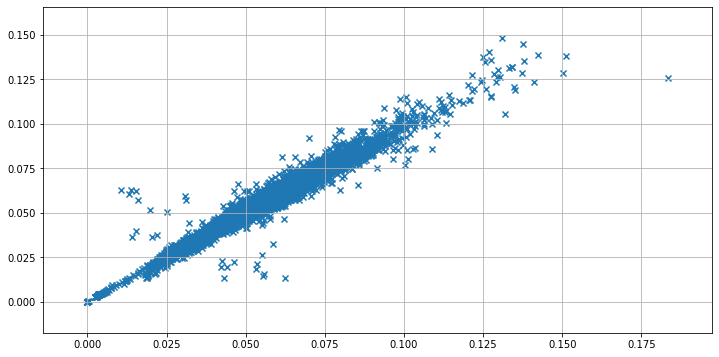

In [115]:
plt.figure(figsize=(12,6))
plt.scatter(full_cpu[7998].to_list(), full_cpu[8163].to_list(), marker="x")
plt.grid()

In [177]:
def get_regression_parameters(cpu_data, best_machine):
    # get the linear regression parameters for each machine wrt the best machine
    # returns a sklearn.linear_model._base.LinearRegression (model)
    
    model_list = []
    for cpu_index in cpu_data.columns:
        X = np.array(cpu_data[cpu_index]).reshape(-1,1)
        model = LinearRegression().fit(X, cpu_data[best_machine])
        model_list.append(model)
        
    return model_list 

X = np.array(full_cpu[7998]).reshape(-1,1)
model = LinearRegression().fit(X, full_cpu[8163])

model.predict(np.array(0.5).reshape(-1,1))

array([0.48922578])

In [120]:
model.intercept_

0.0012407058109098826

In [113]:
df_cpu = pd.DataFrame(np_cpu).transpose()

In [114]:
df_cpu[[9300, 9273]].corr()

,9300,9273
9300,1.000000,0.677392
9273,0.677392,1.000000


In [126]:
mapping = {"a":[1], "b": [2]}

In [132]:
for values in mapping.values():
    print(type(values))

<class 'list'>
<class 'list'>


In [135]:
def get_best_machine(correlation_matrix):
    # takes in the correlation_matrix
    # returns the index of the machine which minimises the correlation 
    # between all machines
    
    # Take the sum of the squared correlation of all machines
    # Note that taking the sum penalizes small values and rewards large values
    squared_matrix = (correlation_matrix**2).sum()
    print(squared_matrix)
    
    return squared_matrix.idxmax()

get_best_machine(df_correlation)

0    1.506896
1    1.217628
2    1.215300
3    1.203686
4    1.156305
5    1.365744
6    1.274507
dtype: float64


0

In [139]:
df_cpu = pd.DataFrame(np_cpu).transpose()

In [143]:
# mean for each machine
df_mean = df_cpu.mean()

(array([ 25.,  17.,   9.,   9.,  19.,  31.,  18.,  32.,  36.,  63., 101.,
        128., 223., 321., 448., 577., 653., 832., 897., 940., 949., 774.,
        668., 621., 465., 441., 391., 370., 364., 305., 269., 228., 190.,
        175., 147., 133., 101.,  76.,  57.,  53.,  48.,  42.,  27.,  31.,
         24.,  29.,  22.,  27.,  14.,  16.,   6.,   8.,   6.,   4.,   4.,
          2.,   3.,   1.,   3.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43

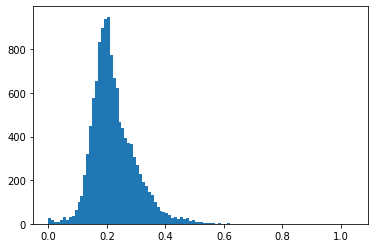

In [147]:
binning = np.arange(0, 1.05, 0.01).tolist()
plt.hist(df_mean, bins = binning)

In [149]:
df_mean.quantile(0.1)

0.1456824279689351

In [150]:
df_mean.quantile(0.9)

0.3202147493635211

In [151]:
df_mean.quantile(0.01)

0.0669634386607946

In [152]:
df_correlation.abs()

,0,1,2,3,4,5,6
0,1.000000,0.182548,0.293396,0.147556,0.371543,0.434098,0.198072
1,0.182548,1.000000,0.243375,0.189525,0.006541,0.171590,0.244268
2,0.293396,0.243375,1.000000,0.140648,0.112303,0.053745,0.186293
3,0.147556,0.189525,0.140648,1.000000,0.058056,0.253711,0.241811
4,0.371543,0.006541,0.112303,0.058056,1.000000,0.014277,0.045071
5,0.434098,0.171590,0.053745,0.253711,0.014277,1.000000,0.283545
6,0.198072,0.244268,0.186293,0.241811,0.045071,0.283545,1.000000


In [153]:
cluster = agc(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_output = cluster.fit_predict(df_correlation)

In [155]:
clustering_output

array([1, 0, 0, 0, 2, 1, 0])

In [159]:
df_correlation.abs().sum()

0    2.627213
1    2.037848
2    2.029760
3    2.031306
4    1.607790
5    2.210967
6    2.199060
dtype: float64

In [165]:
mapping["b"]=[1]
f = pd.DataFrame(mapping)
f

,a,b
0,1,1


In [167]:
f = pd.Series([1,1,1,2,3,4,5,5])
f

0    1
1    1
2    1
3    2
4    3
5    4
6    5
7    5
dtype: int64

,1
0,0.859551
1,0.599362
2,0.454142
3,0.605835
4,0.657417
...,...
12471,0.693923
12472,0.515670
12473,0.598865
12474,0.534777
